*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/5_head_modifiers.ipynb)*

# Time Adverbial Distribution and Collocations
## Head Modifiers
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Mon  6 Jul 2020 13:34:40 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# see .py's for variables
from config import *
from get_hmod_sample import hm_df

In [3]:
def heatmap(data, center=0, **kwargs):
    """Draw seaborne heatmap with custom settings"""
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(
        data,
        center=center,
        cmap=cmap,
        square=True,
        linewidth=.5,
        **kwargs
    )

In [4]:
modis = [
    'plural', 'suffix', 'definite', 'demonstrative', 'cardinal', 
    'ordinal', 'genitive', 'preposition', 'qualitative', 'ø'
]

In [5]:
hm_df.head(2)

,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,ord_str,cl_kind,verb,tense,verb_lex,book_sbl,lang,genre,nom_marks,has_nom
node,,,,,,,,,,,,,,,,,,,,,
651542,Time,Gen 1:1,Genesis,prep_ph,ראשׁית,בְּרֵאשִׁ֖ית,ב.ראשׁית,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,single.prep.bare.øanchor,...,NaN,VC,True,qtl,ברא,Gen,Hebrew,prose,0,False
651544,Subj,Gen 1:1,Genesis,cont,אלהים,אֱלֹהִ֑ים,אלהים,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,בְּרֵאשִׁ֖ית בָּרָ֣א אֱלֹהִ֑ים אֵ֥ת הַשָּׁמַ֖י...,single.øanchor,...,NaN,VC,True,qtl,ברא,Gen,Hebrew,prose,1,True


## Prepare a dataset

In [6]:
# isolate nominal phrases from non-nominal phrases by the head word
# if the head word has a good proportion of nominal uses, select 
# the phrase for the dataset

In [7]:
head_tends = pd.pivot_table(
    hm_df,
    index='head_etcbc',
    columns=['has_nom'],
    aggfunc='size',
    fill_value=0,
)

head_tends

has_nom,False,True
head_etcbc,,
<B/,3,20
<B=/,0,1
<B==/,0,1
<BD/,13,285
<BDH/,8,50
...,...,...
ZW<[,0,1
ZW=,2,0
ZWB/,0,10


In [8]:
ht_props = head_tends.div(head_tends.sum(1), 0)

ht_props

has_nom,False,True
head_etcbc,,
<B/,0.130435,0.869565
<B=/,0.000000,1.000000
<B==/,0.000000,1.000000
<BD/,0.043624,0.956376
<BDH/,0.137931,0.862069
...,...,...
ZW<[,0.000000,1.000000
ZW=,1.000000,0.000000
ZWB/,0.000000,1.000000


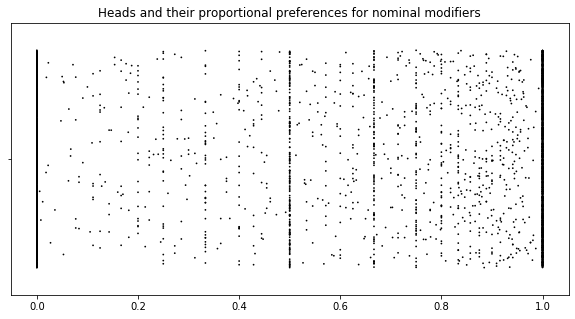

In [9]:
fix, ax = plt.subplots(figsize=(10, 5))
sns.stripplot(
    ht_props[True], 
    color='black',
    ax=ax,
    s=1.75,
    jitter=0.4
)
ax.set_title('Heads and their proportional preferences for nominal modifiers')
ax.set_xlabel('')
plt.show()

In [10]:
ht_props[(ht_props[True] > 0) & (ht_props[True] < 0.1)].head(20)

has_nom,False,True
head_etcbc,,
<LJWN/,0.909091,0.090909
<MLQ/,0.947368,0.052632
<TH,0.994413,0.005587
<WL=/,0.928571,0.071429
<WLM/,0.946524,0.053476
>DWM/,0.923077,0.076923
>LWH/,0.937500,0.062500
>NWC/,0.916667,0.083333
>RM/,0.981132,0.018868


In [11]:
ht_props[(ht_props[True] > 0.2) & (ht_props[True] < 0.3)].head(20)

has_nom,False,True
head_etcbc,,
<NWH=/,0.750000,0.250000
<RPL/,0.777778,0.222222
<SJS/,0.750000,0.250000
<WPRT/,0.750000,0.250000
>BL==/,0.785714,0.214286
>L/,0.707547,0.292453
>LH=/,0.722222,0.277778
>PL=/,0.714286,0.285714
>RJH/,0.714286,0.285714


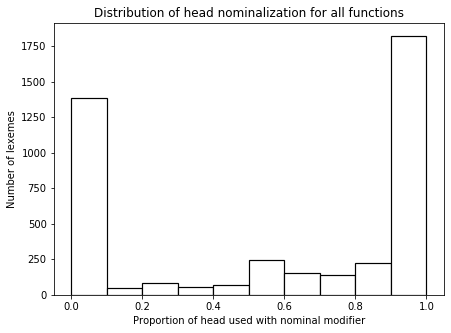

In [12]:
fig, ax = plt.subplots(figsize=(7, 5))
ht_props[True].plot(kind='hist', ax=ax, color='white', edgecolor='black', linewidth=1.2)
ax.set_title('Distribution of head nominalization for all functions')
ax.set_xlabel('Proportion of head used with nominal modifier')
ax.set_ylabel('Number of lexemes')
savefig('hist_head_nom_allfuncts')
plt.show()

In [13]:
nominal_terms = ht_props[ht_props[True] >= 0.45].index

nominal_terms

Index(['<B/', '<B=/', '<B==/', '<BD/', '<BDH/', '<BDT/', '<BD[', '<BJ/',
       '<BR/', '<BR=[',
       ...
       'ZRH[', 'ZRM/', 'ZRMH/', 'ZRT/', 'ZRW</', 'ZRW<=/', 'ZW<[', 'ZWB/',
       'ZWB[', 'ZWZJM/'],
      dtype='object', name='head_etcbc', length=2592)

In [14]:
# assign nominal classification

hm_df['nominal'] = hm_df.head_etcbc.isin(nominal_terms)

hm_df['nominal']

node
651542     True
651544     True
651547     True
651551    False
651554     True
          ...  
904722     True
904724    False
904729     True
904734    False
904739     True
Name: nominal, Length: 73120, dtype: bool

In [15]:
# how are various functions affected by the nominal selection criteria?

functXnom = pd.pivot_table(
    hm_df,
    index='function',
    columns=['nominal'],
    aggfunc='size',
    fill_value=0,
)
functXnom

nominal,False,True
function,,
Adju,1580,5244
Cmpl,4854,12590
Loca,733,1402
Objc,3339,13345
Subj,11147,15393
Time,1072,2421


In [16]:
fn_prop = functXnom.div(functXnom.sum(1), 0)

fn_prop

nominal,False,True
function,,
Adju,0.231536,0.768464
Cmpl,0.278262,0.721738
Loca,0.343326,0.656674
Objc,0.200132,0.799868
Subj,0.420008,0.579992
Time,0.306900,0.693100


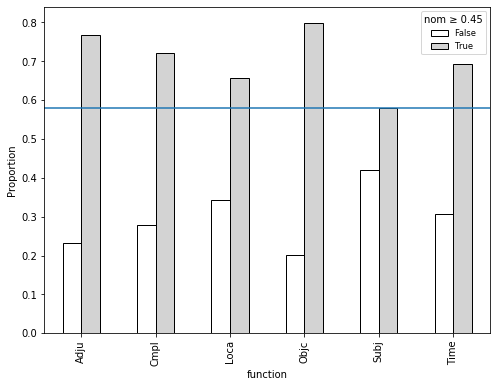

In [17]:
fig, ax = plt.subplots(figsize=(8, 6))
fn_prop.plot(kind='bar', ax=ax, color=['white', 'lightgrey'], edgecolor='black',)
ax.axhline(fn_prop[True].min())
ax.set_ylabel('Proportion')
ax.legend(title='nom ≥ 0.45', fontsize='small')
savefig('bar_nom_heads_functs')
plt.show()

In [18]:
subj_part_heads = hm_df[(hm_df.function == 'Subj') & (hm_df.nominal == False)].head_voc.value_counts()
subj_part_heads = pd.DataFrame(subj_part_heads)

subj_part_heads.head(20)

,head_voc
יְהוָה,2169
הוּא,904
אֲנִי,733
אַתָּה,636
דָּוִד,380
אָנֹכִי,340
הִיא,315
מֹשֶׁה,270
מִי,260
אֲדֹנָי,200


In [19]:
loca_part_heads = hm_df[(hm_df.function == 'Loca') & (hm_df.nominal == False)].head_voc.value_counts()
loca_part_heads = pd.DataFrame(loca_part_heads)

loca_part_heads.head(20)

,head_voc
שָׁם,309
יְרוּשָׁלִַם,50
מִצְרַיִם,26
יִשְׂרָאֵל,22
יְהוָה,20
פֹּה,19
צִיֹּון,17
שֹׁמְרֹון,15
חֶבְרֹון,15
יְהוּדָה,10


In [20]:
# why is YHWH in the Loca results?
# this shows it
hm_df[(hm_df.head_etcbc == 'JHWH/') & (hm_df.function == 'Loca')][['ref', 'text']]

,ref,text
node,,
678438,Exod 27:21,לִפְנֵ֣י יְהוָ֑ה
678661,Exod 28:29,לִפְנֵֽי־יְהוָ֖ה
678677,Exod 28:30,לִפְנֵ֥י יְהוָ֖ה
678719,Exod 28:35,לִפְנֵ֧י יְהוָ֛ה
678759,Exod 28:38,לִפְנֵ֥י יְהוָֽה׃
679364,Exod 30:8,לִפְנֵ֥י יְהוָ֖ה
679452,Exod 30:16,לִפְנֵ֣י יְהוָ֔ה
682627,Exod 40:23,לִפְנֵ֣י יְהוָ֑ה
682641,Exod 40:25,לִפְנֵ֣י יְהוָ֑ה


In [21]:
# finalize dataset for modifier analyses
nom_df = hm_df[hm_df.nominal]

print('head modifier DataFrame shape:', hm_df.shape)
print('nominal DataFrame shape:', nom_df.shape)
print('diff:', len(hm_df) - len(nom_df))

head modifier DataFrame shape: (73120, 47)
nominal DataFrame shape: (50395, 47)
diff: 22725


## Modifier x Genre DP

In [22]:
modXgenre = pd.pivot_table(
    nom_df,
    index='genre',
    values=modis,
    aggfunc='sum',
)
modXgenre = modXgenre.T

modXgenre

genre,instruction,list,poetry,prophetic,prose
cardinal,369.0,39.0,396.0,471.0,1347.0
definite,1648.0,261.0,1012.0,2190.0,6761.0
demonstrative,73.0,10.0,10.0,366.0,830.0
genitive,1445.0,628.0,2193.0,2830.0,5519.0
ordinal,85.0,14.0,3.0,21.0,110.0
plural,1373.0,822.0,3210.0,3807.0,5878.0
preposition,2973.0,556.0,3832.0,5442.0,11221.0
qualitative,222.0,54.0,431.0,591.0,1057.0
suffix,1234.0,233.0,3871.0,3562.0,4588.0
ø,617.0,82.0,1653.0,1798.0,1818.0


In [23]:
# expected proportional representation of total number 
# of phrases for any given genre; retrieved by dividing 
# a genre's total phrases by the marginal total of all genres' n-phrases
exp_prop = modXgenre.sum() / modXgenre.sum().sum()

# observed proportional representation for any given genre
# of a given modifiers's total occurrences
obv_prop = modXgenre.div(modXgenre.sum(1), 0)

# calculate the deviation of proportion of the observed
# proportional representation from the expected proportion
genre_dev_prop = obv_prop.sub(exp_prop, 1)

# calculate DP score following Gries 2008 by summing absolute
# value of all deviations per function and dividing by 2
# the resulting score ranges from 0 to 1 where 0 is the 
# hypothetical perfectly distributed function and 1 is the 
# hypothetical worst distributed function
genre_DP = abs(genre_dev_prop).sum(1) / 2
genre_DP = genre_DP.sort_values()

In [24]:
exp_prop

genre
instruction    0.112097
list           0.030138
poetry         0.185482
prophetic      0.235361
prose          0.436922
dtype: float64

In [25]:
genre_DP

genitive         0.022666
qualitative      0.027504
preposition      0.041806
plural           0.068503
cardinal         0.105443
suffix           0.130240
ø                0.157408
definite         0.159286
demonstrative    0.255568
ordinal          0.317839
dtype: float64

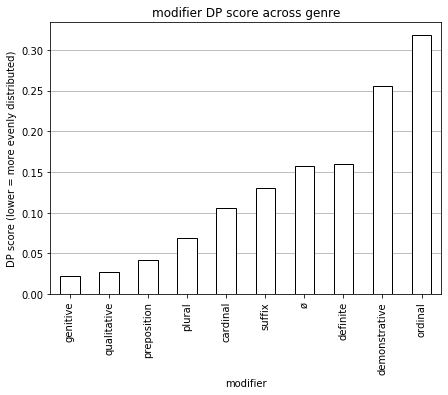

In [26]:
fig, ax = plt.subplots(figsize=(7, 5))
genre_DP.plot(kind='bar', ax=ax, color='white', edgecolor='black')
ax.set_xlabel('modifier')
ax.set_ylabel('DP score (lower = more evenly distributed)')
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.set_title('modifier DP score across genre')
plt.show()

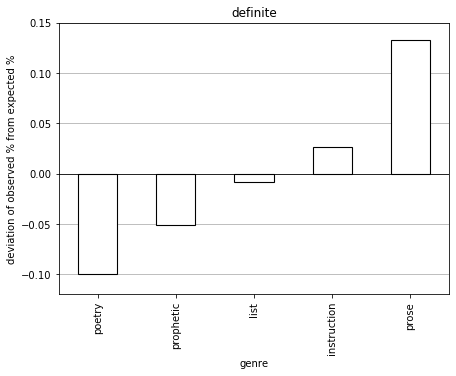

In [27]:
fig, ax = plt.subplots(figsize=(7, 5))
genre_dev_prop.loc['definite'].sort_values().plot(kind='bar', ax=ax, color='white', edgecolor='black', linewidth=1.1)
ax.set_ylim(-0.12, 0.15)
ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y')
ax.set_axisbelow(True) 
ax.set_ylabel('deviation of observed % from expected %', size=10)
ax.set_title('definite')
savefig('devProp_definite_genre')
plt.show()

In [28]:
genre_dev_prop.loc['definite'].sort_values()

genre
poetry        -0.100239
prophetic     -0.050893
list          -0.008153
instruction    0.026717
prose          0.132569
Name: definite, dtype: float64

## Function x Modifier Associations

In [29]:
functXcomp = pd.pivot_table(
    nom_df,
    index='function',
    values=modis,
    aggfunc='sum'
)

functXcomp

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
function,,,,,,,,,,
Adju,354.0,1175.0,76.0,1530.0,10.0,1372.0,4967.0,291.0,1395.0,652.0
Cmpl,568.0,3775.0,227.0,3532.0,9.0,3220.0,11877.0,431.0,3684.0,892.0
Loca,30.0,584.0,32.0,504.0,2.0,243.0,1276.0,68.0,196.0,58.0
Objc,628.0,1908.0,278.0,2873.0,25.0,4062.0,4249.0,599.0,4307.0,2392.0
Subj,631.0,3104.0,185.0,3759.0,25.0,5630.0,76.0,756.0,3804.0,1873.0
Time,411.0,1326.0,491.0,417.0,162.0,563.0,1579.0,210.0,102.0,101.0


In [30]:
#functXcomp.astype(int).to_clipboard()

In [31]:
functXcomp_dp = mystats.apply_deltaP(functXcomp, 0, 1)
functXcomp_f, oddsratios = mystats.apply_fishers(functXcomp, 0, 1, logtransform=False)

In [32]:
functXcomp_dp # ΔP scores 

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
function,,,,,,,,,,
Adju,0.000768,-0.038219,-0.009176,-0.013182,-0.002023,-0.060419,0.174992,-0.001937,-0.037569,-0.013236
Cmpl,-0.013354,0.001794,-0.009268,-0.022892,-0.003333,-0.079385,0.222922,-0.016090,-0.029259,-0.051136
Loca,-0.019920,0.064720,-0.003830,0.028483,-0.002000,-0.090327,0.163537,-0.003700,-0.088067,-0.048895
Objc,0.000232,-0.056536,-0.001778,-0.008022,-0.001876,0.028898,-0.090520,0.002360,0.067458,0.059783
Subj,0.003240,0.030655,-0.006513,0.062402,-0.001724,0.148028,-0.339693,0.015162,0.052792,0.035650
Time,0.050390,0.122037,0.082092,-0.067110,0.029369,-0.067544,0.027893,0.013688,-0.139967,-0.050848


In [33]:
oddsratios

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
Adju,1.027126,0.691613,0.408172,0.893819,0.294263,0.612683,2.231003,0.925209,0.726200,0.795163
Cmpl,0.593006,1.015693,0.460358,0.823277,0.087059,0.536911,2.944089,0.479058,0.789442,0.361871
Loca,0.328008,1.616627,0.733425,1.244807,0.249904,0.426826,2.084779,0.856684,0.386283,0.269683
Objc,1.008180,0.574784,0.878436,0.935066,0.383937,1.220890,0.609915,1.094347,1.628275,2.284888
Subj,1.117160,1.288931,0.584850,1.606021,0.421534,2.522959,0.007347,1.687221,1.470177,1.670163
Time,3.078109,2.294381,10.534300,0.497725,36.912042,0.562612,1.148302,1.559156,0.102576,0.256300


In [34]:
functXcomp_f.round(5) # p-values for statistical significance (Fisher's exact)

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
Adju,0.63947,-0.00000,-0.00000,-0.00011,-0.00001,-0.0,0.00000,-0.22896,-0.0,-0.0
Cmpl,-0.00000,0.46427,-0.00000,-0.00000,-0.00000,-0.0,0.00000,-0.00000,-0.0,-0.0
Loca,-0.00000,0.00000,-0.08583,0.00002,-0.02730,-0.0,0.00000,-0.24476,-0.0,-0.0
Objc,0.85236,-0.00000,-0.06039,-0.00325,-0.00000,0.0,-0.00000,0.06240,0.0,0.0
Subj,0.01813,0.00000,-0.00000,0.00000,-0.00001,0.0,-0.00000,0.00000,0.0,0.0
Time,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.0,0.00001,0.00000,-0.0,-0.0


### PCA clustering of functions based on components

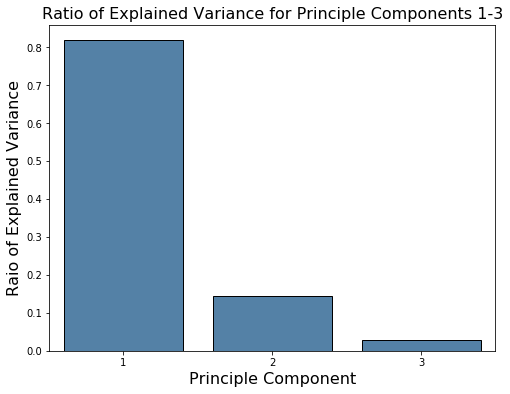

In [35]:
fc_pca, fc_loadings = my_pca.apply_pca(
    functXcomp_dp, 
    sample_axis=0, 
    feature_axis=1,
    components=3,
)

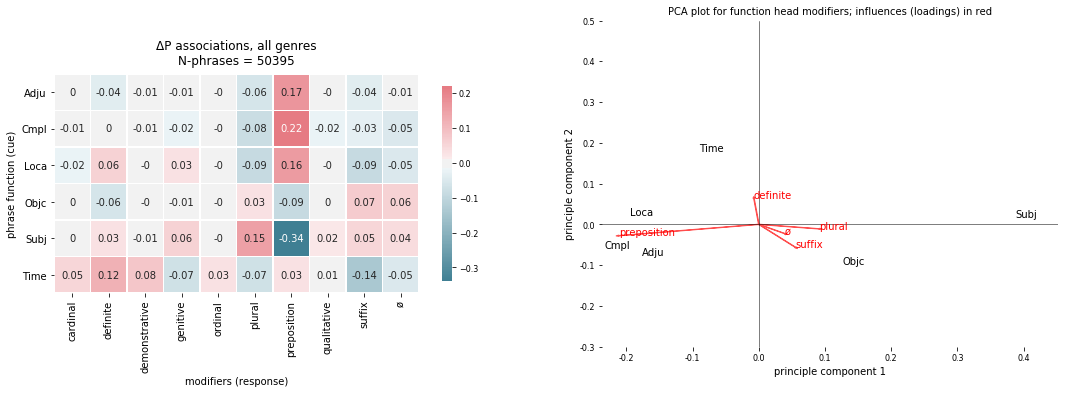

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

ax1, ax2 = axs

# plot scores
heatmap(functXcomp_dp.round(2), ax=ax1, annot=True, cbar_kws={'shrink': 0.6})
ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0)
ax1.set_title(f'ΔP associations, all genres\nN-phrases = {len(nom_df)}', pad=10)
ax1.set_xlabel('modifiers (response)')
ax1.set_ylabel('phrase function (cue)')

# ajust color bar settings
cbar = ax1.collections[0].colorbar
cbar.ax.tick_params(labelsize=8)

# plot PCA
x, y = fc_pca['PC1'], fc_pca['PC2']
ax2.scatter(x, y, s=9, color='')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlabel('principle component 1')
ax2.set_ylabel('principle component 2')
ax2.set_title('PCA plot for function head modifiers; influences (loadings) in red', size=10)
#ax2.axis('equal')
ax2.set_yticks(ax2.get_xticks())

# Hide the spines but keep the ticks
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_yticklabels(ax2.get_yticks().round(1), size=8)
ax2.set_xticklabels(ax2.get_xticks().round(1), size=8)

# plot function labels
xoff = -0.03
yoff = -0.002
for i, function in enumerate(fc_pca.index):
    ax2.text(x[i]+xoff, y[i]+yoff, function)
    
# plot loadings arrows + labels (scree plot)
loads = fc_loadings.T[[1, 2]].loc[fc_loadings.T[[1, 2]].abs().sum(1).sort_values(ascending=False).index][:5]
for l in loads.index:
    x,y = loads.loc[l]
    ax2.arrow(0, 0, x, y, color='#ff4d4d')
    ax2.text(x, y, l, color='red', size=10)

savefig('PCA_ΔP_funct_modis')

## Pull out some text examples

In [37]:
show = ['ref', 'text', 'sentence']
time_demo = hm_df[
    (hm_df.function == 'Time')
    & (hm_df.demonstrative == True)
]

pd.DataFrame(time_demo.token.value_counts()).head(10)

,token
ב.ה.יום.ה.הוא,203
עד.ה.יום.ה.זה,73
ב.ה.עת.ה.היא,58
ה.יום.ה.זה,29
ב.ה.יום.ה.הם,23
ב.ה.לילה.ה.הוא,15
ב.עצם.ה.יום.ה.זה,14
אחר.ה.דבר.ה.אלה,11
כ.ה.יום.ה.זה,8
ב.ה.יום.ה.זה,7


In [38]:
time_demo[time_demo.token == 'ב.ה.יום.ה.הוא'][show].head(10)

,ref,text,sentence
node,,,
655391,Gen 15:18,בַּיֹּ֣ום הַה֗וּא,בַּיֹּ֣ום הַה֗וּא כָּרַ֧ת יְהוָ֛ה אֶת־אַבְרָ֖ם...
659624,Gen 26:32,בַּיֹּ֣ום הַה֗וּא,וַיְהִ֣י׀ בַּיֹּ֣ום הַה֗וּא
661471,Gen 30:35,בַּיֹּום֩ הַה֨וּא,וַיָּ֣סַר בַּיֹּום֩ הַה֨וּא אֶת־הַתְּיָשִׁ֜ים ...
662865,Gen 33:16,בַּיֹּ֨ום הַה֥וּא,וַיָּשָׁב֩ בַּיֹּ֨ום הַה֥וּא עֵשָׂ֛ו לְדַרְכֹּ...
668856,Gen 48:20,בַּיֹּ֣ום הַהוּא֮,וַיְבָ֨רֲכֵ֜ם בַּיֹּ֣ום הַהוּא֮ לֵאמֹור֒
670920,Exod 5:6,בַּיֹּ֣ום הַה֑וּא,וַיְצַ֥ו פַּרְעֹ֖ה בַּיֹּ֣ום הַה֑וּא אֶת־הַנֹּ...
672016,Exod 8:18,בַיֹּ֨ום הַה֜וּא,וְהִפְלֵיתִי֩ בַיֹּ֨ום הַה֜וּא אֶת־אֶ֣רֶץ גֹּ֗...
673790,Exod 13:8,בַּיֹּ֥ום הַה֖וּא,וְהִגַּדְתָּ֣ לְבִנְךָ֔ בַּיֹּ֥ום הַה֖וּא לֵאמ...
674359,Exod 14:30,בַּיֹּ֥ום הַה֛וּא,וַיֹּ֨ושַׁע יְהוָ֜ה בַּיֹּ֥ום הַה֛וּא אֶת־יִשׂ...


In [39]:

time_cards = hm_df[
    (hm_df.function == 'Time')
    & (hm_df.cardinal == True)
]

pd.DataFrame(time_cards.token.value_counts()).head(10)

,token
שׁבע.יום,67
ארבע.שׁנה,24
שׁבע.שׁנה,18
שׁלשׁ.יום,17
שׁשׁ.יום,14
שׁלשׁ.שׁנה,13
שׁשׁ.שׁנה,12
ב.יום.אחד,11
ב.ה.צהרים,11
בין.ה.ערב,10


In [40]:
time_cards[time_cards.token == 'ארבע.שׁנה'][show]

,ref,text,sentence
node,,,
675146,Exod 16:35,אַרְבָּעִ֣ים שָׁנָ֔ה,וּבְנֵ֣י יִשְׂרָאֵ֗ל אָֽכְל֤וּ אֶת־הַמָּן֙ אַר...
696851,Num 14:33,אַרְבָּעִ֣ים שָׁנָ֔ה,וּ֠בְנֵיכֶם יִהְי֨וּ רֹעִ֤ים בַּמִּדְבָּר֙ אַר...
696864,Num 14:34,אַרְבָּעִ֖ים שָׁנָ֑ה,בְּמִסְפַּ֨ר הַיָּמִ֜ים אֲשֶׁר־תַּרְתֶּ֣ם אֶת־...
702725,Num 32:13,אַרְבָּעִ֖ים שָׁנָ֑ה,וַיְנִעֵם֙ בַּמִּדְבָּ֔ר אַרְבָּעִ֖ים שָׁנָ֑ה ...
704819,Deut 2:7,אַרְבָּעִ֣ים שָׁנָ֗ה,יָדַ֣ע לֶכְתְּךָ֔ אֶת־הַמִּדְבָּ֥ר הַגָּדֹ֖ל ה...
707065,Deut 8:2,אַרְבָּעִ֥ים שָׁנָ֖ה,וְזָכַרְתָּ֣ אֶת־כָּל־הַדֶּ֗רֶךְ אֲשֶׁ֨ר הֹלִֽ...
707111,Deut 8:4,אַרְבָּעִ֥ים שָׁנָֽה׃,וְרַגְלְךָ֖ לֹ֣א בָצֵ֑קָה זֶ֖ה אַרְבָּעִ֥ים שׁ...
713776,Deut 29:4,אַרְבָּעִ֥ים שָׁנָ֖ה,וָאֹולֵ֥ךְ אֶתְכֶ֛ם אַרְבָּעִ֥ים שָׁנָ֖ה בַּמּ...
716923,Josh 5:6,אַרְבָּעִ֣ים שָׁנָ֗ה,כִּ֣י׀ אַרְבָּעִ֣ים שָׁנָ֗ה הָלְכ֣וּ בְנֵֽי־יִ...


In [41]:
time_ords = hm_df[
    (hm_df.function == 'Time')
    & (hm_df.ordinal == True)
]

pd.DataFrame(time_ords.token.value_counts()).head(10)

,token
ב.ה.יום.ה.שׁביעי,37
ב.ה.יום.ה.שׁלישׁי,25
ב.ה.יום.ה.שׁמיני,14
ב.ה.יום.ה.שׁני,10
ב.ה.שׁנה.ה.שׁני,7
ב.ה.שׁנה.ה.שׁביעי,6
ב.ה.חדשׁ.ה.ראשׁון,6
ב.ה.יום.ה.ראשׁון,5
ב.ה.חדשׁ.ה.שׁני,5
ב.ה.יום.ה.שׁשׁי,5


In [42]:
time_ords[time_ords.token == 'ב.ה.חדשׁ.ה.ראשׁון'][show]

,ref,text,sentence
node,,,
682554,Exod 40:17,בַּחֹ֧דֶשׁ הָרִאשֹׁ֛ון,בַּחֹ֧דֶשׁ הָרִאשֹׁ֛ון בַּשָּׁנָ֥ה הַשֵּׁנִ֖ית...
694907,Num 9:1,בַּחֹ֥דֶשׁ הָרִאשֹׁ֖ון,וַיְדַבֵּ֣ר יְהוָ֣ה אֶל־מֹשֶׁ֣ה בְמִדְבַּר־סִ֠...
698759,Num 20:1,בַּחֹ֣דֶשׁ הָֽרִאשֹׁ֔ון,וַיָּבֹ֣אוּ בְנֵֽי־יִ֠שְׂרָאֵל כָּל־הָ֨עֵדָ֤ה ...
874568,Esth 3:7,בַּחֹ֤דֶשׁ הָרִאשֹׁון֙,בַּחֹ֤דֶשׁ הָרִאשֹׁון֙ בִּשְׁנַת֙ שְׁתֵּ֣ים עֶ...
874639,Esth 3:12,בַּחֹ֣דֶשׁ הָרִאשֹׁ֗ון,וַיִּקָּרְאוּ֩ סֹפְרֵ֨י הַמֶּ֜לֶךְ בַּחֹ֣דֶשׁ ...
890249,1 Chr 12:16,בַּחֹ֣דֶשׁ הָרִאשֹׁ֔ון,אֵ֣לֶּה הֵ֗ם אֲשֶׁ֨ר עָבְר֤וּ אֶת־הַיַּרְדֵּן֙...


## Digging into similarities

In [43]:
modi_freqs = pd.pivot_table(
    nom_df,
    index='function',
    columns=modis,
    aggfunc='size',
    fill_value=0,
)
modi_freqs

plural        False                                                        \
suffix        False                                                         
definite      False                                                         
demonstrative False                                                         
cardinal      False                                                         
ordinal       False                                                         
genitive      False                               True                      
preposition   False             True              False       True          
qualitative   False       True  False       True  False True  False True    
ø             False True  False False True  False False False False False   
function                                                                    
Adju             10   117     4    69   535    40    36     1  1053    21   
Cmpl              2   142     0   100   750    50   204     0  2267    63   
Loca              2    24     0    19    34     7    59     0   349    23   
Objc            187  2371    62     4    21     8  1105    43   814    36   
Subj            150  1866    98     0     7     1  2244   101     7     1   
Time              1    53     1     5    48    17    15     0   306     0   

plural         ... True                                                         
suffix         ... False True                                                   
definite       ... True  False                                     True         
demonstrative  ... True  False                               True  False        
cardinal       ... True  False                   True        False False        
ordinal        ... False False                   False       False False        
genitive       ... False False                   False       False False        
preposition    ... True  False       True        False True  False True         
qualitative    ... False False True  False True  False False False False True   
ø              ... False False False False False False False False False False  
function       ...                                                              
Adju           ...     0    12     1   373    62     0    10     0     0     0  
Cmpl           ...     6    14     0  1017    73     0    13     0     1     0  
Loca           ...     0     5     0    33     5     0    10     0     0     0  
Objc           ...     2   821    52   411    42     4     5     1     0     1  
Subj           ...     0  1000    95     4     0     7     0     0     0     0  
Time           ...     0     0    16    40     3     0     0     0     0     0  

[6 rows x 87 columns]

In [44]:
def_df = modi_freqs.groupby(axis=1, level=('definite')).sum().loc[['Time', 'Loca']]
prep_df = modi_freqs.groupby(axis=1, level='preposition').sum().loc[['Time', 'Loca']]
multi_index = pd.MultiIndex.from_product([('definite', 'preposition'), (False, True)])
time_loca = pd.concat([def_df, prep_df], 1)
time_loca.columns = multi_index

#time_loca.to_clipboard()

time_loca

definite       preposition      
            False True        False True 
function                                 
Time         1095  1326         842  1579
Loca          818   584         126  1276

In [45]:
time_loca_prop = time_loca.copy()

for modi in ('definite', 'preposition'):
    time_loca_prop[(modi,)] = time_loca_prop[(modi,)].div(time_loca_prop[(modi,)].sum(1), 0)

#time_loca_prop.round(2).to_clipboard()
    
time_loca_prop

definite           preposition          
             False     True        False     True 
function                                          
Time      0.452292  0.547708    0.347790  0.652210
Loca      0.583452  0.416548    0.089872  0.910128

### Modifier Tendencies by genre 

In [46]:
fm_genre = pd.pivot_table(
    nom_df,
    index=['function'],
    values=modis,
    columns=['genre'],
    aggfunc='sum',
    fill_value=0,
)
fm_genre

cardinal                                definite              \
genre    instruction list poetry prophetic prose instruction list poetry   
function                                                                   
Adju              36    8     54        99   157         164   30    212   
Cmpl              41    2     80        97   348         500   49    355   
Loca              16    1      1         3     9          69   11     94   
Objc             119    7     97        97   308         314   16     56   
Subj              89   12    158       141   231         461  142    203   
Time              68    9      6        34   294         140   13     92   

                          ...      suffix                              \
genre    prophetic prose  ... instruction list poetry prophetic prose   
function                  ...                                           
Adju           382   387  ...         140   82    394       395   384   
Cmpl           699  2172  ...         339   27    771       836  1711   
Loca           105   305  ...          32   24     35        39    66   
Objc           301  1221  ...         399   26   1381      1186  1315   
Subj           479  1819  ...         313   71   1272      1082  1066   
Time           224   857  ...          11    3     18        24    46   

                   ø                              
genre    instruction list poetry prophetic prose  
function                                          
Adju              59    9    212       237   135  
Cmpl             105   21    279       235   252  
Loca               9    3     18        15    13  
Objc             231   32    632       687   810  
Subj             205   17    493       600   558  
Time               8    0     19        24    50  

[6 rows x 50 columns]

In [47]:
fm_genre.loc[:, pd.IndexSlice[:, 'poetry']]

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
genre,poetry,poetry,poetry,poetry,poetry,poetry,poetry,poetry,poetry,poetry
function,,,,,,,,,,
Adju,54,212,1,298,0,331,1231,70,394,212
Cmpl,80,355,0,483,1,647,2047,71,771,279
Loca,1,94,0,47,0,59,199,7,35,18
Objc,97,56,1,519,1,965,201,90,1381,632
Subj,158,203,4,781,1,1168,10,134,1272,493
Time,6,92,4,65,0,40,144,59,18,19


In [48]:
fm_genre.loc[:, pd.IndexSlice[:, 'prose']]

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
genre,prose,prose,prose,prose,prose,prose,prose,prose,prose,prose
function,,,,,,,,,,
Adju,157,387,54,585,5,383,1542,107,384,135
Cmpl,348,2172,139,1853,2,1381,5728,209,1711,252
Loca,9,305,16,238,0,88,571,36,66,13
Objc,308,1221,192,1178,8,1510,2499,281,1315,810
Subj,231,1819,97,1500,6,2166,34,327,1066,558
Time,294,857,332,165,89,350,847,97,46,50


In [49]:
genres = nom_df.genre.value_counts() # get sorted list of genres for iteration

genre_pivots = {}
genre_deltPs = {}
genre_fishers = {}
min_score = 0 # for configuring the heatmaps 
max_score = 0

# run significance tests across all genres
for genre in genres.index:
    genre_pivot = fm_genre.loc[:, pd.IndexSlice[:, genre]]
    genre_pivot.columns = genre_pivot.columns.droplevel('genre')
    genre_deltP = mystats.apply_deltaP(genre_pivot, 0, 1)
    genre_fish, genre_odds = mystats.apply_fishers(genre_pivot, 0, 1, logtransform=False)
    
    if genre not in ['list','instruction']:
        g_min = genre_deltP.min().min()
        g_max = genre_deltP.max().max()
        min_score = g_min if g_min < min_score else min_score
        max_score = g_max if g_max > max_score else max_score
    
    genre_pivots = genre_pivot
    genre_deltPs[genre] = genre_deltP
    genre_fishers[genre] = genre_fish

In [50]:
# check for statistical significance

select_genres = ['prose', 'prophetic', 'poetry',]

print('Fisher\'s Exact scores by genre')
for genre in select_genres:
    print(genre)
    display(genre_fishers[genre])

Fisher's Exact scores by genre
prose


,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
Adju,9.408431e-03,-1.280582e-35,-1.874179e-03,4.853294e-03,-7.429983e-02,-2.783108e-19,4.305854e-67,5.243529e-01,-3.564285e-03,-1.237654e-03
Cmpl,-5.790876e-14,-2.695088e-09,-8.559923e-33,-4.919973e-03,-4.364617e-18,-3.403459e-98,0.000000e+00,-7.846093e-29,2.220514e-03,-8.321281e-98
Loca,-1.599720e-11,2.080343e-07,-1.538424e-02,1.718192e-04,-3.492757e-02,-3.168528e-22,2.930687e-28,-1.000000e+00,-2.862929e-18,-1.177248e-14
Objc,-4.159122e-01,-4.892038e-36,-6.508245e-01,-2.525889e-06,-8.584537e-06,2.939525e-04,-4.661023e-06,3.378781e-02,9.504332e-16,6.671309e-88
Subj,-8.359935e-03,9.969119e-53,-2.081550e-10,7.978911e-45,-3.417215e-05,1.916207e-239,-0.000000e+00,9.859898e-18,5.108260e-09,7.494084e-29
Time,1.126901e-58,3.108376e-49,1.553217e-147,-6.162269e-61,2.359811e-77,-1.085592e-10,-4.128129e-02,1.504922e-01,-4.220643e-113,-1.325568e-21


prophetic


,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
Adju,0.008182,1.802254e-01,-1.194797e-15,-6.522101e-04,-2.351736e-01,-2.997460e-30,2.190911e-113,-2.845660e-01,-1.073323e-22,-7.407867e-05
Cmpl,-0.000030,2.230399e-03,-1.945499e-04,-1.172318e-07,-1.367797e-02,-7.945446e-36,1.791477e-250,-5.378781e-12,-2.260900e-16,-7.538156e-63
Loca,-0.001107,8.795870e-08,1.505611e-01,5.141155e-02,-1.000000e+00,-3.269964e-11,4.356901e-19,3.804929e-01,-2.724966e-14,-1.109463e-09
Objc,-0.072315,-1.630567e-36,-2.628727e-02,6.881283e-01,-3.930995e-02,1.039335e-16,-9.868793e-91,7.329058e-01,2.260384e-42,4.530909e-44
Subj,0.000227,-3.880112e-01,-5.124133e-04,2.351127e-18,-1.000000e+00,5.190404e-94,-0.000000e+00,3.873963e-12,4.095631e-32,9.439648e-28
Time,0.023160,1.017567e-27,9.672092e-86,-3.686252e-03,3.615276e-14,-1.825815e-23,4.649239e-11,6.986592e-01,-2.169409e-53,-3.959457e-17


poetry


,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
Adju,-8.927817e-02,5.208084e-04,-1.000000,-7.722453e-06,-1.000000,-5.423398e-31,2.722588e-162,-7.943153e-01,-2.960655e-40,-2.057230e-06
Cmpl,-1.543223e-04,2.873013e-06,-0.072039,-1.970455e-13,1.000000,-5.364204e-33,1.590939e-309,-5.631482e-09,-1.264611e-43,-9.104274e-31
Loca,-2.805639e-04,4.917937e-26,-1.000000,-5.898981e-02,-1.000000,-2.467841e-04,2.954156e-22,-1.784053e-01,-3.632880e-19,-1.681408e-06
Objc,7.199717e-01,-1.000018e-57,-0.468940,-9.570391e-01,0.556481,3.995613e-20,-2.092594e-257,-1.686650e-01,3.703799e-83,6.611070e-44
Subj,1.866428e-10,-4.073444e-05,0.287304,4.151868e-30,1.000000,1.271058e-53,-0.000000e+00,7.117224e-03,1.220833e-32,2.051582e-05
Time,-1.584694e-01,9.832238e-26,0.000096,3.952946e-01,-1.000000,-1.298082e-09,8.197737e-06,2.233346e-25,-5.931991e-30,-9.036033e-06


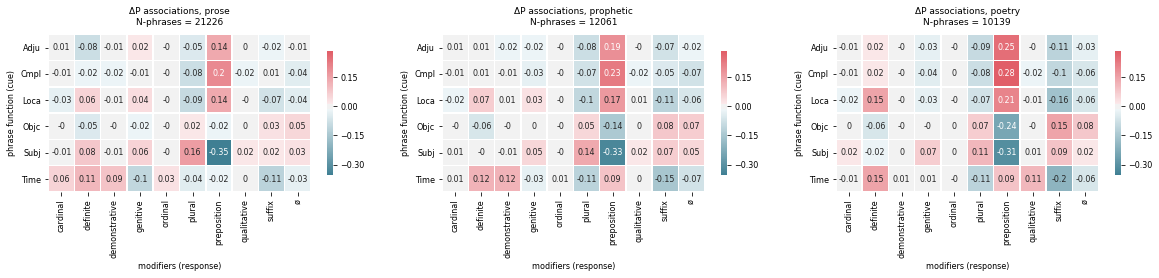

In [51]:
fig = plt.figure(figsize=(20, 10))

for i, genre in enumerate(select_genres):
    deltp = genre_deltPs[genre]
    ax = fig.add_subplot(2, 3, i+1)    
    heatmap(
        deltp.round(2), 
        ax=ax, 
        annot=True, 
        cbar_kws={'shrink': 0.5}, 
        annot_kws={'size': 8},
        vmin=min_score,
        vmax=max_score,
    )
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=8)
    ax.set_xticklabels(ax.get_xticklabels(), size=8)
    ax.set_title(f'ΔP associations, {genre}\nN-phrases = {genres[genre]}', pad=10, size=9)
    ax.set_xlabel('modifiers (response)', size=8)
    ax.set_ylabel('phrase function (cue)', size=8)
    # ajust color bar sizes
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)
    i += 1
    
savefig('ΔP_modifiers_genre')

In [52]:
genre_deltPs['poetry']

,cardinal,definite,demonstrative,genitive,ordinal,plural,preposition,qualitative,suffix,ø
function,,,,,,,,,,
Adju,-0.005503,0.017696,-0.000295,-0.030925,-0.000217,-0.090415,0.250803,-0.001171,-0.111247,-0.028727
Cmpl,-0.009707,0.019672,-0.000842,-0.041948,0.000043,-0.079124,0.282113,-0.015313,-0.098144,-0.056750
Loca,-0.022283,0.147509,-0.000619,-0.030697,-0.000186,-0.066835,0.207669,-0.011035,-0.161422,-0.062102
Objc,0.000998,-0.061263,-0.000457,-0.000518,0.000096,0.067519,-0.235651,-0.004093,0.153683,0.079687
Subj,0.018192,-0.017252,0.000463,0.070905,0.000075,0.111665,-0.306182,0.007747,0.091320,0.023067
Time,-0.010705,0.148900,0.008577,0.013763,-0.000186,-0.106629,0.093986,0.108977,-0.198101,-0.058583


In [53]:
[x._text for x in ax.get_xticklabels()]

['cardinal',
 'definite',
 'demonstrative',
 'genitive',
 'ordinal',
 'plural',
 'preposition',
 'qualitative',
 'suffix',
 'ø']

## Tiberian concerns

In [54]:
functXmod_np = pd.pivot_table(
    nom_df,
    index='function',
    values=[m for m in modis if m != 'preposition'],
    columns=['preposition', 'genre'],
    aggfunc='sum'
)

functXmod_np

cardinal                                                        \
preposition       False                                     True                
genre       instruction  list poetry prophetic  prose instruction list poetry   
function                                                                        
Adju                4.0   5.0    2.0       1.0   19.0        32.0  3.0   52.0   
Cmpl                0.0   0.0    1.0       1.0    5.0        41.0  2.0   79.0   
Loca                0.0   0.0    0.0       0.0    0.0        16.0  1.0    1.0   
Objc               93.0   6.0   94.0      85.0  230.0        26.0  1.0    3.0   
Subj               89.0  12.0  158.0     141.0  227.0         0.0  0.0    0.0   
Time               58.0   8.0    4.0      15.0  233.0        10.0  1.0    2.0   

                              ...           ø                                \
preposition                   ...       False                                 
genre       prophetic  prose  ... instruction  list poetry prophetic  prose   
function                      ...                                             
Adju             98.0  138.0  ...         9.0   0.0   16.0      45.0   47.0   
Cmpl             96.0  343.0  ...         6.0   5.0   22.0      33.0   76.0   
Loca              3.0    9.0  ...         6.0   0.0    6.0       6.0    6.0   
Objc             12.0   78.0  ...       226.0  32.0  625.0     682.0  806.0   
Subj              0.0    4.0  ...       203.0  17.0  490.0     598.0  558.0   
Time             19.0   61.0  ...         1.0   0.0   11.0       7.0   34.0   

                                                       
preposition       True                                 
genre       instruction  list poetry prophetic  prose  
function                                               
Adju               50.0   9.0  196.0     192.0   88.0  
Cmpl               99.0  16.0  257.0     202.0  176.0  
Loca                3.0   3.0   12.0       9.0    7.0  
Objc                5.0   0.0    7.0       5.0    4.0  
Subj                2.0   0.0    3.0       2.0    0.0  
Time                7.0   0.0    8.0      17.0   16.0  

[6 rows x 90 columns]

In [55]:
functXmod_np.columns[0]

('cardinal', False, 'instruction')

In [56]:
functXmod_np.loc[:, pd.IndexSlice[:, False, 'poetry']]

,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
preposition,False,False,False,False,False,False,False,False,False
genre,poetry,poetry,poetry,poetry,poetry,poetry,poetry,poetry,poetry
function,,,,,,,,,
Adju,2.0,1.0,0.0,11.0,0.0,12.0,1.0,20.0,16.0
Cmpl,1.0,1.0,0.0,13.0,0.0,17.0,0.0,6.0,22.0
Loca,0.0,0.0,0.0,2.0,0.0,4.0,0.0,1.0,6.0
Objc,94.0,26.0,0.0,482.0,1.0,907.0,76.0,1265.0,625.0
Subj,158.0,202.0,4.0,777.0,1.0,1165.0,134.0,1271.0,490.0
Time,4.0,41.0,0.0,13.0,0.0,15.0,44.0,1.0,11.0


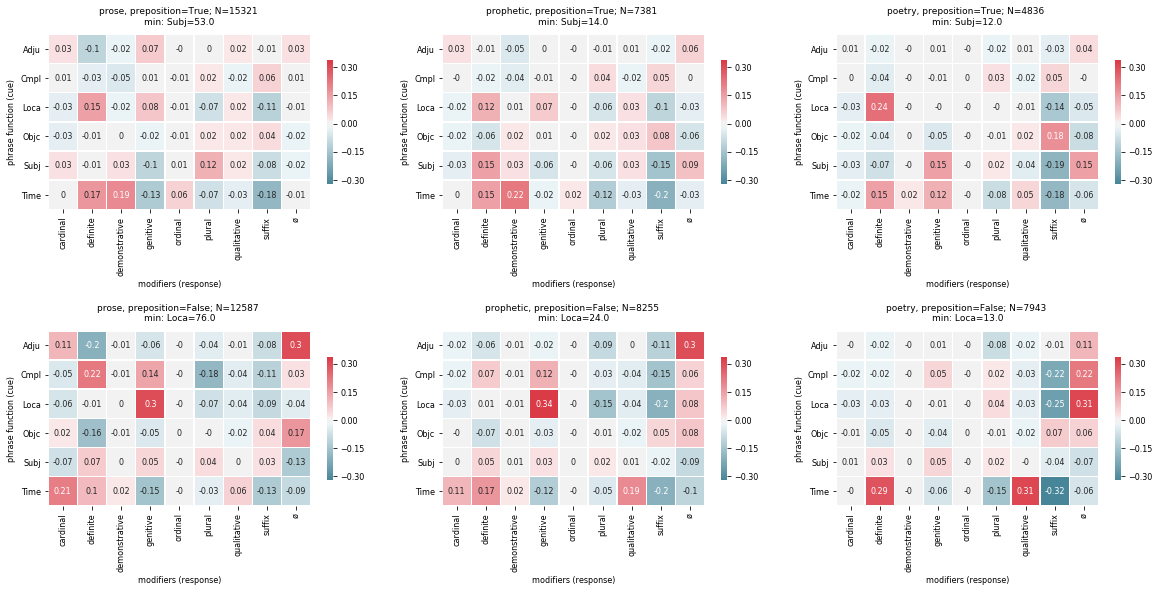

In [57]:
fig = plt.figure(figsize=(20, 10))

preps = [True, False]
genres = ['prose', 'prophetic', 'poetry']
indices = pd.MultiIndex.from_product([preps, genres])
functXmod_np_raw = collections.defaultdict(dict)
functXmod_np_delts = collections.defaultdict(dict)
min_score = 0
max_score = 0
    
for is_prep, genre in indices:    
    
    # build data
    data_df = functXmod_np.loc[:, pd.IndexSlice[:, is_prep, genre]]
    data_df.columns = data_df.columns.droplevel(['preposition', 'genre'])
    data_delt = mystats.apply_deltaP(data_df, 0, 1)
    
    functXmod_np_raw[genre][is_prep] = data_df
    functXmod_np_delts[genre][is_prep] = data_delt

    g_min = data_delt.min().min()
    g_max = data_delt.max().max()
    min_score = g_min if g_min < min_score else min_score
    max_score = g_max if g_max > max_score else max_score

    
i = 1
for is_prep, genre in indices:
    data_delt = functXmod_np_delts[genre][is_prep]
    samp_sizes = functXmod_np_raw[genre][is_prep].sum(1).sort_values()
    samp_sizes = tuple(zip(samp_sizes.index, samp_sizes))
    min_func, min_samp = samp_sizes[0]
    total_size = int(functXmod_np_raw[genre][is_prep].sum().sum())
    
    ax = fig.add_subplot(2, 3, i)
    i += 1
    heatmap(
        data_delt.round(2), 
        ax=ax, 
        annot=True,
        cbar_kws={'shrink': 0.5}, 
        annot_kws={'size': 8},
        vmin=min_score,
        vmax=max_score,
    )

    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, size=8)
    ax.set_xticklabels(ax.get_xticklabels(), size=8)
    ax.set_title(f'{genre}, preposition={is_prep}; N={total_size} \nmin: {min_func}={min_samp}', pad=10, size=9)
    ax.set_xlabel('modifiers (response)', size=8)
    ax.set_ylabel('phrase function (cue)', size=8)
    # ajust color bar sizes
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=8)

savefig('ΔP_modis_prep_genre')

In [58]:
functXmod_np_raw['prose'][False]

,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
function,,,,,,,,,
Adju,19.0,1.0,0.0,13.0,0.0,25.0,3.0,5.0,47.0
Cmpl,5.0,215.0,1.0,159.0,0.0,47.0,1.0,13.0,76.0
Loca,0.0,15.0,1.0,36.0,0.0,15.0,0.0,3.0,6.0
Objc,230.0,284.0,24.0,448.0,5.0,854.0,88.0,515.0,806.0
Subj,227.0,1805.0,93.0,1494.0,5.0,2151.0,324.0,1060.0,558.0
Time,233.0,270.0,30.0,32.0,0.0,212.0,89.0,10.0,34.0


In [59]:
functXmod_np_raw['prophetic'][False]

,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
function,,,,,,,,,
Adju,1.0,2.0,0.0,14.0,0.0,19.0,4.0,13.0,45.0
Cmpl,1.0,22.0,0.0,41.0,0.0,37.0,0.0,14.0,33.0
Loca,0.0,2.0,0.0,12.0,0.0,3.0,0.0,1.0,6.0
Objc,85.0,118.0,5.0,450.0,1.0,862.0,76.0,852.0,682.0
Subj,141.0,474.0,55.0,824.0,4.0,1360.0,206.0,1081.0,598.0
Time,15.0,27.0,3.0,5.0,0.0,25.0,25.0,4.0,7.0


In [60]:
functXmod_np_raw['poetry'][False]

,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
function,,,,,,,,,
Adju,2.0,1.0,0.0,11.0,0.0,12.0,1.0,20.0,16.0
Cmpl,1.0,1.0,0.0,13.0,0.0,17.0,0.0,6.0,22.0
Loca,0.0,0.0,0.0,2.0,0.0,4.0,0.0,1.0,6.0
Objc,94.0,26.0,0.0,482.0,1.0,907.0,76.0,1265.0,625.0
Subj,158.0,202.0,4.0,777.0,1.0,1165.0,134.0,1271.0,490.0
Time,4.0,41.0,0.0,13.0,0.0,15.0,44.0,1.0,11.0


In [61]:
# sample sizes in poetry
functXmod_np_raw['poetry'][False].sum(1)

function
Adju      63.0
Cmpl      60.0
Loca      13.0
Objc    3476.0
Subj    4202.0
Time     129.0
dtype: float64

# Comparisons between functions

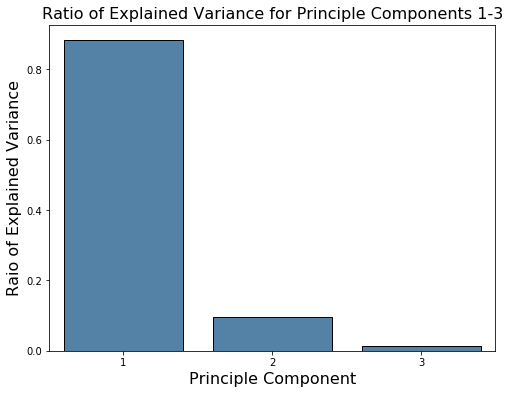

In [62]:
poet_pca, poet_loadings = my_pca.apply_pca(
    genre_deltPs['poetry'], 
    sample_axis=0, 
    feature_axis=1,
    components=3,
)

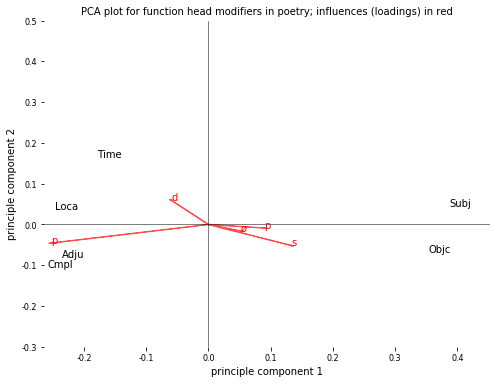

In [63]:
fig, ax2 = plt.subplots(figsize=(8, 6))

# plot PCA
x, y = poet_pca['PC1'], poet_pca['PC2']
ax2.scatter(x, y, s=9, color='')
ax2.axhline(0, color='black', linewidth=0.5)
ax2.axvline(0, color='black', linewidth=0.5)
ax2.set_xlabel('principle component 1')
ax2.set_ylabel('principle component 2')
ax2.set_title('PCA plot for function head modifiers in poetry; influences (loadings) in red', size=10)
#ax2.axis('equal')
ax2.set_yticks(ax2.get_xticks())

# Hide the spines but keep the ticks
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.xaxis.set_ticks_position('bottom')
ax2.set_yticklabels(ax2.get_yticks().round(1), size=8)
ax2.set_xticklabels(ax2.get_xticks().round(1), size=8)

# plot function labels
xoff = -0.03
yoff = -0.002
for i, function in enumerate(poet_pca.index):
    ax2.text(x[i]+xoff, y[i]+yoff, function)
    
# plot loadings arrows + labels (scree plot)
loads = poet_loadings.T[[1, 2]].loc[poet_loadings.T[[1, 2]].abs().sum(1).sort_values(ascending=False).index][:5]
for l in loads.index:
    x,y = loads.loc[l]
    ax2.arrow(0, 0, x, y, color='#ff4d4d')
    ax2.text(x, y, l[0], color='red', size=10)

savefig('PCA_ΔP_funct_modis_poetry')

## Preposition Inquiries

In [65]:
ndf_time = nom_df[nom_df.function == 'Time']

ndf_time.shape

(2421, 47)

In [76]:
prep_marked = pd.pivot_table(
    ndf_time,
    index='leading_prep',
    columns='ø',
    aggfunc='size',
    fill_value=0,
)
# sort
prep_marked = prep_marked.loc[prep_marked.sum(1).sort_values(ascending=False).index]

# filter out rare preps
prep_marked = prep_marked.loc[prep_marked.sum(1) > 20]

# flip
prep_marked = prep_marked.T

prep_marked.to_clipboard()

prep_marked

leading_prep,ב,עד,ל,מן,כ,אחר
ø,,,,,,
False,1064,186,123,66,39,38
True,5,19,3,18,2,0


In [78]:
prep_marked_prop = prep_marked.div(prep_marked.sum())

prep_marked_prop.round(3).to_clipboard()

prep_marked_prop

leading_prep,ב,עד,ל,מן,כ,אחר
ø,,,,,,
False,0.995323,0.907317,0.97619,0.785714,0.95122,1.0
True,0.004677,0.092683,0.02381,0.214286,0.04878,0.0


In [93]:
# prepositional versus non-prepositional

has_prep = ndf_time.preposition.value_counts()
has_prep_prop = has_prep / has_prep.sum()

has_prep_with_prop = pd.concat([has_prep, has_prep_prop], 1)
has_prep_with_prop.index = ['freq', 'prop']
has_prep_with_prop.T.round(2).to_clipboard()

has_prep_with_prop

,preposition,preposition
freq,1579,0.65221
prop,842,0.34779


In [99]:
# comparison with other argument types

prep_funct = pd.pivot_table(
    nom_df,
    index='function',
    columns='preposition',
    aggfunc='size',
    fill_value=0,
)

prep_funct = prep_funct.T

prep_funct.to_clipboard()

prep_funct

function,Adju,Cmpl,Loca,Objc,Subj,Time
preposition,,,,,,
False,277,713,126,9096,15317,842
True,4967,11877,1276,4249,76,1579


In [100]:
prep_funct_prop = prep_funct.div(prep_funct.sum())

prep_funct_prop.round(2).to_clipboard()

prep_funct_prop

function,Adju,Cmpl,Loca,Objc,Subj,Time
preposition,,,,,,
False,0.052822,0.056632,0.089872,0.681604,0.995063,0.34779
True,0.947178,0.943368,0.910128,0.318396,0.004937,0.65221


In [107]:
# kinds of modifiers reflected in non-preps
time_acc = pd.pivot_table(
    ndf_time[ndf_time.preposition == False],
    index='function',
    values=[m for m in modis if m != 'preposition'],
    aggfunc='sum',
    fill_value=0,
)

time_acc

,cardinal,definite,demonstrative,genitive,ordinal,plural,qualitative,suffix,ø
function,,,,,,,,,
Time,318,350,33,66,0,330,179,18,53


## Head Word x Modifier Associations (Time)

In [123]:
# times = head_mod_df[head_mod_df.function == 'Time']

# headXmod = pd.pivot_table(
#     noun_df,
#     index='head',
#     values=modifiers,
#     aggfunc='sum',
#     fill_value=0,
# ).T

In [19]:
head_delt_mod = mystats.apply_deltaP(headXmod, 0, 1).fillna(0)
head_delt_mod = head_delt_mod[head_delt_mod.abs().sum().sort_values(ascending=False).index]
head_delt_mod.iloc[:, :20]

head,יום,שׁנה,עתה,עולם,עת,בקר,אז,חדשׁ,לילה,ערב,מות,כן,תמיד,מחר,נצח,מתי,נעורים,חיים,דבר,מחרת
cardinal,-0.035698,0.437461,-0.056580,-0.054392,-0.058925,-0.037043,-0.021100,0.043982,-0.029535,-0.026415,-0.008284,-0.016255,-0.008440,-0.007815,-0.008440,-0.007815,-0.002813,-0.002813,-0.007971,-0.008128
definite,0.184315,-0.042301,-0.066507,-0.061130,0.005540,0.050897,-0.024802,-0.000193,0.034401,0.044689,-0.009737,-0.019107,-0.009921,-0.009186,-0.009921,-0.009186,-0.003307,-0.003307,0.001851,-0.008619
demonstrative,0.333953,-0.055376,-0.053259,-0.055405,0.082172,-0.037733,-0.021493,-0.022531,0.005742,-0.026907,-0.008438,-0.016558,-0.008597,-0.007961,-0.008597,-0.007961,-0.002866,-0.002866,0.018132,-0.008279
genitive,0.215724,-0.030725,-0.056874,-0.052072,0.065670,-0.037235,-0.018608,-0.008337,-0.035350,-0.026551,0.033307,-0.016339,-0.008484,-0.007855,-0.005882,-0.007855,-0.002828,-0.002828,-0.008013,0.004841
ordinal,0.204325,0.090951,-0.054749,-0.052632,-0.057018,-0.035844,-0.020417,0.145191,-0.034029,-0.019236,-0.008016,-0.015729,-0.008167,-0.007562,-0.008167,-0.007562,-0.002722,-0.002722,-0.007713,-0.007864
plural,0.227281,0.086300,-0.058321,-0.046442,-0.049189,-0.032408,-0.021750,0.018967,-0.026626,-0.027227,-0.008539,-0.016755,-0.008700,-0.008055,-0.008700,-0.008055,0.008649,0.008649,0.012956,-0.008378
preposition,-0.077027,-0.030340,-0.071144,0.048270,0.030792,0.032806,-0.021699,-0.002339,-0.009005,0.024820,0.008253,0.015494,-0.011252,-0.006845,0.007330,0.007449,0.000537,0.000537,-0.000621,0.007747
qualitative,0.349341,-0.048085,-0.055158,-0.053025,-0.003634,-0.036112,-0.020570,-0.020859,0.058659,-0.025750,-0.008076,-0.015846,-0.008228,-0.007618,-0.008228,-0.007618,-0.002743,-0.002743,-0.007771,-0.007923
suffix,-0.066265,-0.046639,-0.054257,-0.052158,0.043033,-0.035522,-0.020234,0.004532,-0.033723,-0.025330,0.091594,-0.015588,-0.008094,-0.007494,-0.008094,-0.007494,0.057025,0.057025,0.012264,-0.007794
ø,-0.553127,-0.078919,0.306940,0.116445,-0.062815,-0.023247,0.107108,-0.028990,0.008253,-0.026893,-0.009421,0.036053,0.047038,0.038310,0.018720,0.017333,-0.003199,-0.003199,-0.009065,0.011734


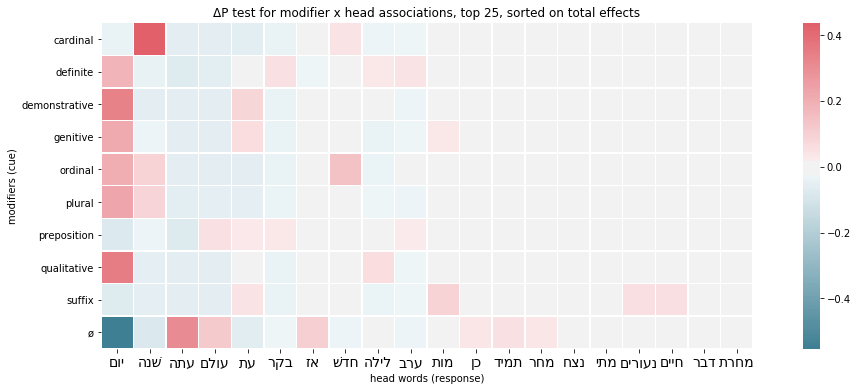

In [20]:
fig, ax = plt.subplots(figsize=(18, 6))

heatmap(head_delt_mod.iloc[:,:20], ax=ax,)
x_tick_labels = [get_display(hw._text) for hw in ax.get_xticklabels()] # fix Hebrew labels
ax.set_xticklabels(x_tick_labels, size=14)
ax.set_ylabel('modifiers (cue)')
ax.set_xlabel('head words (response)')
ax.set_title('ΔP test for modifier x head associations, top 25, sorted on total effects')

savefig('ΔP_mod_head')

plt.show()

In [21]:
head_counts = times['head'].value_counts(ascending=False)
head_prop = head_counts / head_counts.sum()

head_prop

יום        0.387106
עתה        0.102006
שׁנה       0.074785
עולם       0.051003
עת         0.044413
             ...   
אשׁמורה    0.000287
שׁמשׁ      0.000287
רוח        0.000287
מעים       0.000287
תבואה      0.000287
Name: head, Length: 113, dtype: float64

In [22]:
head_counts

יום        1351
עתה         356
שׁנה        261
עולם        178
עת          155
           ... 
אשׁמורה       1
שׁמשׁ         1
רוח           1
מעים          1
תבואה         1
Name: head, Length: 113, dtype: int64

In [23]:
head_counts.sum()

3490

## Modifier x Modifier Association

In [25]:
comps_data = {}
dp_comps = {}

functions = [
    'Time',
    'Loca',
    'Adju',
    'Cmpl',
    'Objc',
    'Subj',
]

for funct in functions:

    funct_data = functs_df[functs_df.function == funct]
    comps = funct_data[modifiers] * 1 # mult by 1 turns T/F into 1/0
    comps = comps.T.dot(comps) # dot product for pairwise
    np.fill_diagonal(comps.values, 0) # ignore diagonals
    comps_data[funct] = comps
    
    deltaP_comps = mystats.apply_deltaP(comps, 0, 1)
    np.fill_diagonal(deltaP_comps.values, 0)
    dp_comps[funct] = deltaP_comps

In [26]:
dp_comps.keys()

dict_keys(['Time', 'Loca', 'Adju', 'Cmpl', 'Objc', 'Subj'])

In [27]:
dp_comps['Time']

,plural,suffix,definite,demonstrative,cardinal,ordinal,genitive,preposition,qualitative,ø
plural,0.000000,0.080292,-0.096085,-0.068650,0.211674,-0.041237,0.046081,-0.055029,0.104066,-0.054474
suffix,0.302470,0.000000,-0.216816,-0.116363,-0.035188,-0.037626,-0.057136,0.191363,0.046987,-0.049704
definite,-0.057600,-0.034503,0.000000,0.189153,-0.036591,0.063578,-0.070437,0.255005,0.019955,-0.061274
demonstrative,-0.068231,-0.030701,0.313608,0.000000,-0.038599,-0.041274,-0.062675,0.149825,-0.039787,-0.054522
cardinal,0.638836,-0.028190,-0.184215,-0.117207,0.000000,-0.037899,-0.040464,-0.106752,-0.038601,-0.050064
ordinal,-0.116674,-0.028260,0.300070,-0.117495,-0.035530,0.000000,-0.057692,0.182458,-0.038696,-0.050188
genitive,0.087586,-0.028828,-0.223325,-0.119856,-0.025483,-0.038756,0.000000,0.397034,0.061677,-0.051196
preposition,-0.025058,0.023131,0.193701,0.068642,-0.016107,0.029365,0.095120,0.000000,-0.038151,0.149129
qualitative,0.289290,0.034673,0.092537,-0.111283,-0.035555,-0.038019,0.090206,-0.232903,0.000000,-0.050223
ø,-0.118115,-0.028609,-0.221629,-0.118946,-0.035969,-0.038462,-0.058405,0.710114,-0.039174,0.000000


In [28]:
max_score = max(table.max().max() for table in dp_comps.values())
min_score = min(table.min().min() for table in dp_comps.values())

In [29]:
min_score

-0.39742246437552387

In [30]:
max_score

0.9872170997485331

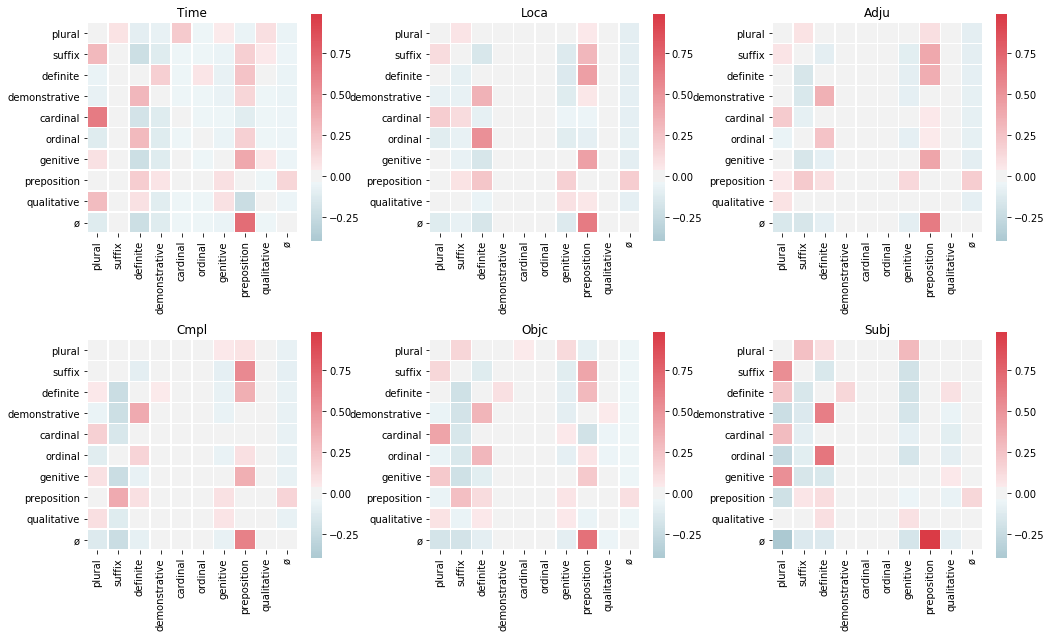

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(17, 10))
axs = axs.ravel()
fig.subplots_adjust(wspace=0.3, hspace=0.4)

for i, funct in enumerate(functions):
    heatmap(dp_comps[funct], ax=axs[i], vmin=min_score, vmax=max_score)
    axs[i].set_title(funct)

savefig('comp_comp_ΔP_function')
plt.show()

Unique to Time:

* plural is more predictive of cardinal, vice versa


### Build a Gephi network

We will export these scores in the form of edges in a Gephi network.

In [ ]:
gephi_dir = Path('../../gephi/adverbial_components/')

for funct in functions:

    gephi_nodes = pd.DataFrame(dp_comps[funct].index)
    gephi_nodes.columns=['Label']
    gephi_nodes.index.name = 'ID'

    edge_data = []
    for i1, comp1 in enumerate(dp_comps[funct].index):
        for i2, comp2 in enumerate(dp_comps[funct].columns):
            weight = round(dp_comps[funct].loc[comp1][comp2], 2)
            if weight and weight > 0:
                edge_data.append((i1, i2, weight))

    gephi_edges = pd.DataFrame(edge_data, columns=['Source', 'Target', 'Weight'])

    gephi_nodes.to_csv(gephi_dir.joinpath(f'{funct}_comp_nodes.csv'))
    gephi_edges.to_csv(gephi_dir.joinpath(f'{funct}_comp_edges.csv'), index=False)

**Gephi graph with ΔP as edge weight and Force Atlas 2**

<img src="../../gephi/advb_article/Time_comp_graph.svg" height="40%" width="40%">

In the graph we can make out 6 sub-networks:

* plural, cardinal
* suffix, plural, preposition
* genitive, plural, preposition
* definite, demonstrative, preposition
* definite, ordinal, preposition
* bare, preposition

## ΔP with Preposition Lexemes

In [54]:
prep_comps = head_mod_df[['leading_prep', 'plural', 'suffix', 'demonstrative', 'cardinal', 'ordinal', 'genitive', 'ø']] * 1
raw_prepXcomp = prep_comps.groupby('leading_prep').sum()
prepXcomp = raw_prepXcomp[raw_prepXcomp.sum(1) > 20]
prepXcomp

,plural,suffix,demonstrative,cardinal,ordinal,genitive,ø
leading_prep,,,,,,,
אחר,63,36,15,2,0,21,101
אל,398,376,56,17,1,520,993
את,1244,1582,262,54,12,1240,916
ב,1474,2075,440,83,163,2066,1392
בין,30,14,2,2,0,3,5
בעד,5,8,3,0,0,3,6
דרך,0,3,0,0,0,15,6
כ,217,139,61,31,5,344,157
כמו,4,0,0,0,0,4,31


In [55]:
dp_prepXcomp = mystats.apply_deltaP(prepXcomp, 0, 1)

dp_prepXcomp

,plural,suffix,demonstrative,cardinal,ordinal,genitive,ø
leading_prep,,,,,,,
אחר,0.057072,-0.084469,0.027426,-0.003040,-0.006681,-0.145404,0.155097
אל,-0.042971,-0.082404,-0.013158,-0.004587,-0.006745,-0.013284,0.163148
את,0.031944,0.076729,0.016497,-0.001525,-0.005329,0.001291,-0.119608
ב,-0.022331,0.046956,0.028940,-0.000853,0.019716,0.048870,-0.121297
בין,0.328244,0.014982,-0.000107,0.024341,-0.006640,-0.179233,-0.181587
בעד,-0.008102,0.085026,0.084250,-0.011429,-0.006633,-0.112559,-0.030553
דרך,-0.208265,-0.110136,-0.035850,-0.011429,-0.006633,0.392857,-0.020544
כ,0.020017,-0.092338,0.029062,0.021782,-0.001433,0.132417,-0.109508
כמו,-0.105671,-0.235358,-0.035869,-0.011434,-0.006636,-0.130072,0.525040


In [56]:
# fig,ax = plt.subplots(figsize=(8, 5))
# sns.heatmap(dp_prepXcomp, ax=ax, robust=True, center=0)
# ax.set_yticklabels((get_display(prep) for prep in dp_prepXcomp.index), rotation=0, size=12)
# plt.show()